# ScRNA-Seq of human bone marrow

In [1]:
# Import packages
import scanpy as sc
import pandas as pd
from functions import data_preprocessing as dp
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## Read AnnData and add metadata information

In [2]:
file_paths = '../../../data/processed/immune_cells/merged/'
filename = 'Oetjen_merged.h5ad'

file = file_paths + filename
adata = sc.read(file, cache=True)
adata.X.shape


(14779, 10462)

In [3]:
adata.obs.head(5)

,n_counts,log_n_counts,n_genes,log_n_genes,pct_counts_in_top_20_genes,mt_frac,ribo_frac,hem_frac,outlier,size_factors,cell_type,patientID,study,chemistry,tissue,species,data_type,sample_ID
barcode,,,,,,,,,,,,,,,,,,
AAACCTGCAGCGAACA-1-Oetjen_A,6379.0,8.760923,1862,7.529943,0.243769,0.047970,0.214924,0.012071,False,1.094988,Non-classical monocytes,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,Oetjen_A
AAACCTGCATGTCCTC-1-Oetjen_A,4172.0,8.336390,1082,6.987490,0.321908,0.024928,0.456376,0.007191,False,0.718537,Memory CD4+ T cells,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,Oetjen_A
AAACCTGGTCGACTGC-1-Oetjen_A,6608.0,8.796187,1618,7.389564,0.241979,0.051907,0.314770,0.012409,False,1.133669,Classical Monocytes,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,Oetjen_A
AAACCTGGTCGCTTCT-1-Oetjen_A,5034.0,8.524169,1413,7.254178,0.265793,0.041716,0.264998,0.008741,False,0.865837,Classical Monocytes,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,Oetjen_A
AAACCTGTCCCGACTT-1-Oetjen_A,3998.0,8.293799,1127,7.028201,0.292646,0.043522,0.397949,0.012756,False,0.687454,Memory CD4+ T cells,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,Oetjen_A


## Visualize

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


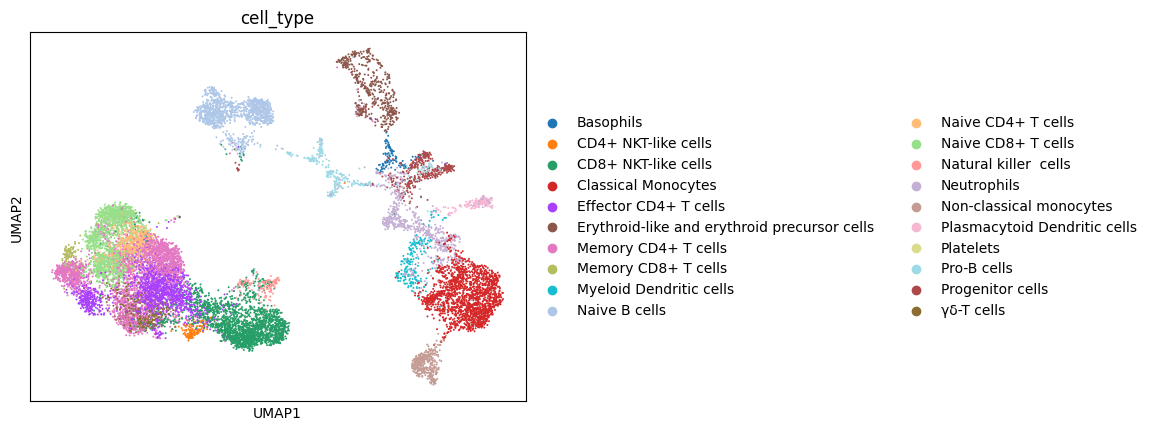

In [4]:
from sklearn.preprocessing import StandardScaler
vis_adata = adata.copy()
sc.pp.highly_variable_genes(vis_adata, n_top_genes=4000, flavor="cell_ranger")

# Scale data using dp.scale_data() to subtract data by the mean of each feature and divide by the std of that feature.
# This was done as a preprocessing step for annotating cell types in ScType in R and will therefore be used for visualization purpose. 
# https://github.com/satijalab/seurat/issues/1166  
vis_adata.X = dp.scale_data(vis_adata.X)

sc.pp.pca(vis_adata, n_comps=60, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(vis_adata, n_neighbors=15, n_pcs=60)
sc.tl.umap(vis_adata)
sc.pl.umap(vis_adata, color='cell_type')

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


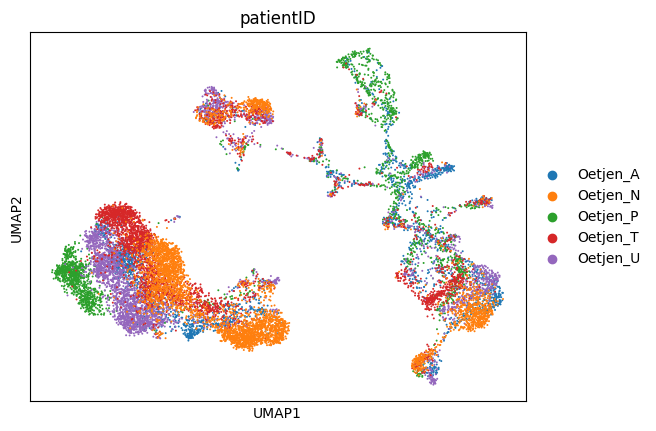

In [5]:
sc.pl.umap(vis_adata, color='patientID')

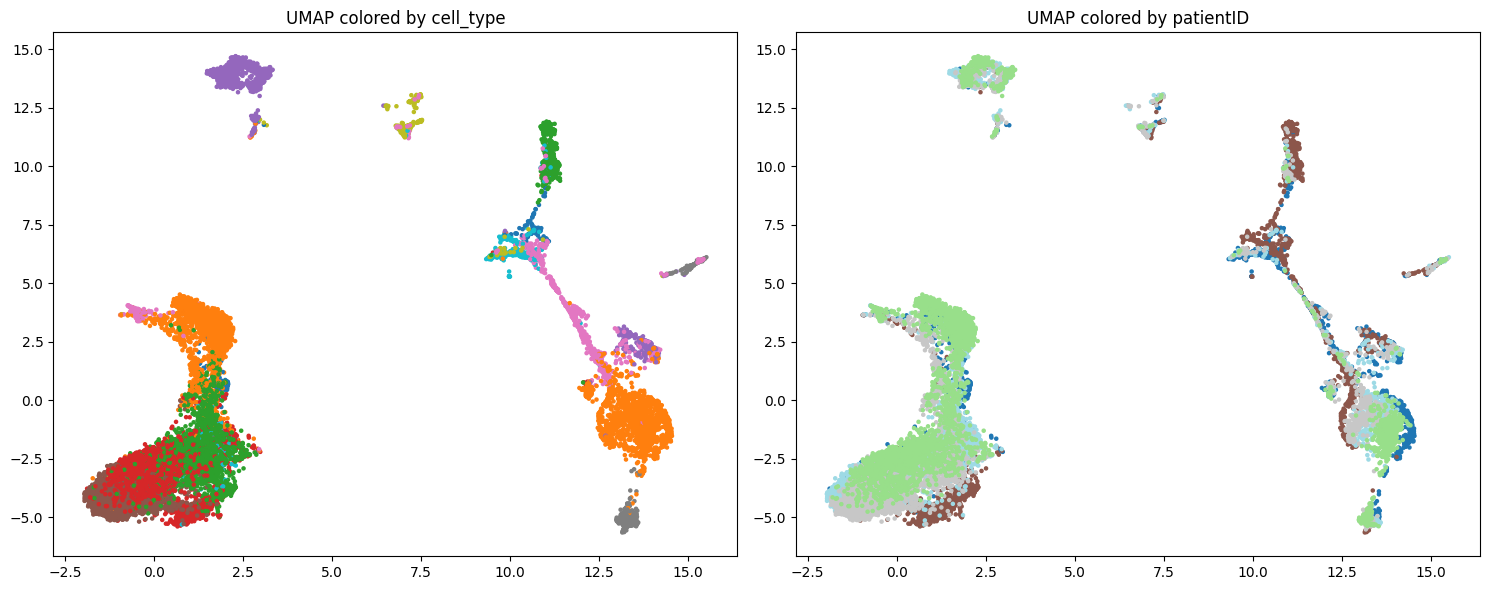

In [25]:
import matplotlib.pyplot as plt
import scanpy as sc
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.preprocessing import LabelEncoder

# Assuming adata is already defined
vis_adata = adata.copy()

# Preprocessing
sc.pp.highly_variable_genes(vis_adata, n_top_genes=2000, flavor="cell_ranger")
vis_adata = vis_adata[:, vis_adata.var['highly_variable']]
pca = PCA(n_components=60, svd_solver='arpack')
vis_adata.obsm["X_pca"] = pca.fit_transform(vis_adata.X)
umap = UMAP(n_components=2, n_neighbors=15)
vis_adata.obsm["X_umap"] = umap.fit_transform(vis_adata.obsm["X_pca"])

# Convert categorical variables to numerical labels
le_cell_type = LabelEncoder()
vis_adata.obs["cell_type_encoded"] = le_cell_type.fit_transform(vis_adata.obs["cell_type"])

le_patientID = LabelEncoder()
vis_adata.obs["patientID_encoded"] = le_patientID.fit_transform(vis_adata.obs["patientID"])

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot UMAP colored by cell_type
axs[0].scatter(vis_adata.obsm["X_umap"][:, 0], vis_adata.obsm["X_umap"][:, 1], c=vis_adata.obs["cell_type_encoded"], cmap='tab10', s=5)
axs[0].set_title('UMAP colored by cell_type')

# Plot UMAP colored by patientID
axs[1].scatter(vis_adata.obsm["X_umap"][:, 0], vis_adata.obsm["X_umap"][:, 1], c=vis_adata.obs["patientID_encoded"], cmap='tab20', s=5)
axs[1].set_title('UMAP colored by patientID')

plt.tight_layout()
plt.show()
